In [1]:
from main import Task, train, test

In [2]:
task = Task()
samples, labels = task.next_batch()

In [3]:
# (batchsize, max_len + 1, vocab_size)
samples.shape

(100, 11, 3)

In [4]:
samples[0]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
# (batchsize, 1, max_len + 1)
labels.shape

(100, 1, 11)

In [6]:
labels[0]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Without Positional encodings

In [7]:
_ = train(print_every=250, pos_enc=False)

Iteration 250 - Loss 1.6700439453125
Iteration 500 - Loss 1.3713023662567139
Iteration 750 - Loss 1.5837630033493042
Iteration 1000 - Loss 1.2754212617874146
Iteration 1250 - Loss 1.1670920848846436
Iteration 1500 - Loss 1.1033684015274048
Epoch  1724: reducing learning rate of group 0 to 1.0000e-04.
Iteration 1750 - Loss 0.9997305870056152
Iteration 2000 - Loss 0.9309741258621216
Iteration 2000 - Loss 0.9309741258621216
Training complete!



Input: 
[[['C']
  ['A']
  ['C']
  ['C']
  ['C']
  ['C']
  ['C']
  ['B']
  ['B']
  ['B']
  ['B']]]

Prediction: 
[[5]]

Encoder-Decoder Attention: 
Output step 0 attended mainly to Input steps: [ 7  8  9 10]
[0.072, 0.058, 0.072, 0.072, 0.072, 0.072, 0.072, 0.127, 0.127, 0.127, 0.127]


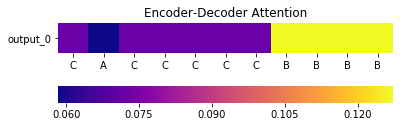

In [8]:
_ = test(pos_enc=False)

# With Positional encodings

In [9]:
loss_hist = train(print_every=250, pos_enc=True, num_enc_layers=1)

Iteration 250 - Loss 1.8333065509796143
Iteration 500 - Loss 1.487678050994873
Iteration 750 - Loss 1.1412402391433716
Iteration 1000 - Loss 0.48354998230934143
Iteration 1250 - Loss 0.2923632562160492
Iteration 1500 - Loss 1.1677156686782837
Iteration 1750 - Loss 0.23710504174232483
Iteration 2000 - Loss 0.18062952160835266
Iteration 2000 - Loss 0.18062952160835266
Training complete!



Input: 
[[['B']
  ['C']
  ['A']
  ['B']
  ['C']
  ['C']
  ['C']
  ['B']
  ['B']
  ['C']
  ['C']]]

Prediction: 
[[3]]

Encoder-Decoder Attention: 
Output step 0 attended mainly to Input steps: [2]
[0.03, 0.038, 0.64, 0.034, 0.038, 0.038, 0.038, 0.034, 0.034, 0.038, 0.038]


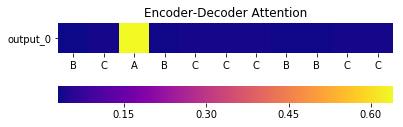


L2-Norm of Input Positional Encoding:
[4.017, 0.431, 0.43, 0.432, 0.434, 0.434, 0.429, 0.433, 0.433, 0.426, 0.432]


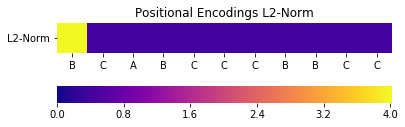

In [10]:
 samples, labels, predictions, attention, input_pos_enc = test(pos_enc=True, num_enc_layers=1)

# With positional encodings and more encoder layers

In [11]:
loss_hist = train(print_every=250, pos_enc=True,
                  num_enc_layers=6, steps=1250)

Iteration 250 - Loss 1.2629730701446533
Iteration 500 - Loss 0.46846190094947815
Iteration 750 - Loss 0.21491453051567078
Iteration 1000 - Loss 0.04504004120826721
Iteration 1250 - Loss 0.019231684505939484
Iteration 1250 - Loss 0.019231684505939484
Training complete!



Input: 
[[['B']
  ['B']
  ['B']
  ['A']
  ['C']
  ['A']
  ['C']
  ['A']
  ['B']
  ['B']
  ['B']]]

Prediction: 
[[5]]

Encoder-Decoder Attention: 
Output step 0 attended mainly to Input steps: [6]
[0.085, 0.083, 0.083, 0.096, 0.106, 0.096, 0.106, 0.096, 0.083, 0.083, 0.083]


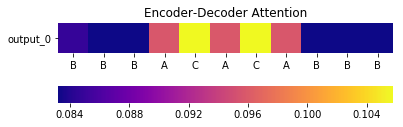


L2-Norm of Input Positional Encoding:
[1.805, 0.237, 0.241, 0.259, 0.242, 0.244, 0.234, 0.24, 0.245, 0.25, 0.239]


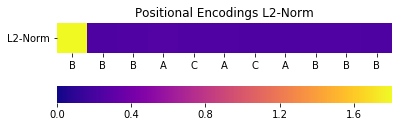

In [12]:
_ = test(pos_enc=True, num_enc_layers=6)